<a href="https://colab.research.google.com/github/andrybrew/IHT-SEM1302-30Okt/blob/main/practice_material/sentiment_analysis_vader_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis: VADER (English)**

##**Importing required libraries**

In [2]:
# Import the necessary libraries
import requests
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

##**Import Dataset from Apify Runs**

In [3]:
# Fetching the dataset from Apify
api_url = "https://api.apify.com/v2/datasets/frJ70OrRuAsbtK11R/items"
api_token = "apify_api_NbL3VeatZbemul8vsNCyVKRhzmRv0M0Wh9ql"  # Substitute with your actual API token


In [4]:
# Making a GET request to the API
params = {"token": api_token, "format": "json"}  # parameter untuk permintaan
response = requests.get(api_url, params=params)

# Checking the response status
if response.status_code == 200:  # Sukses
    # Processing the JSON data into a pandas DataFrame
    data = response.json()
    df_tweet = pd.DataFrame(data)

    # Saving the DataFrame to a CSV file
    df_tweet.to_csv("twitter_data.csv", index=False)
    print("Data berhasil diunduh dan disimpan sebagai twitter_data.csv")
else:
    print(f"Terjadi kesalahan: {response.status_code}. Pesan: {response.text}")

Data berhasil diunduh dan disimpan sebagai twitter_data.csv


## **Performing Sentiment Analysis**



In [5]:
# text preprocessing
df_tweet['text'] = df_tweet['text'].str.replace('[^\w\s]', '').str.lower()

<ipython-input-5-edb86112105e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tweet['text'] = df_tweet['text'].str.replace('[^\w\s]', '').str.lower()


In [6]:
# Download the corpus
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
# Create a vader sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Create a list of sentences
sentences = df_tweet['text']

# Calculate the compound sentiment score of each sentence
scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

<ipython-input-8-d54339c306e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=scores)


<Axes: ylabel='Density'>

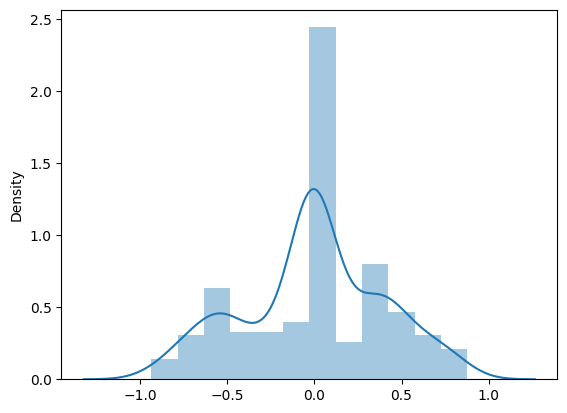

In [8]:
# Visualize the compound sentiment using seaborn
sns.distplot(x=scores)

In [9]:
# After calculating the sentiment scores
df_tweet['sentiment_score'] = scores

def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Applying the function to the sentiment_score column
df_tweet['sentiment'] = df_tweet['sentiment_score'].apply(categorize_sentiment)

In [10]:
# Previewing the dataset
df_tweet[['text', 'sentiment_score', 'sentiment']]

,text,sentiment_score,sentiment
0,i get a apple payment declined everyday no mf ...,-0.2960,Negative
1,definitely will have the most oh do i pay for ...,0.2585,Positive
2,only if its an apple payment,0.0000,Neutral
3,how about apple payment please\ncan you use th...,0.2263,Positive
4,the top of your response look a lot like an ap...,0.5106,Positive
...,...,...,...
277,yeah it wouldnt submit my apple payment twice ...,-0.5574,Negative
278,more like apple payment failed amirite guys,-0.1298,Negative
279,apple payment failed,-0.5106,Negative
280,wouldnt apple still take a cut if you purchase...,-0.2023,Negative


<Axes: xlabel='sentiment', ylabel='count'>

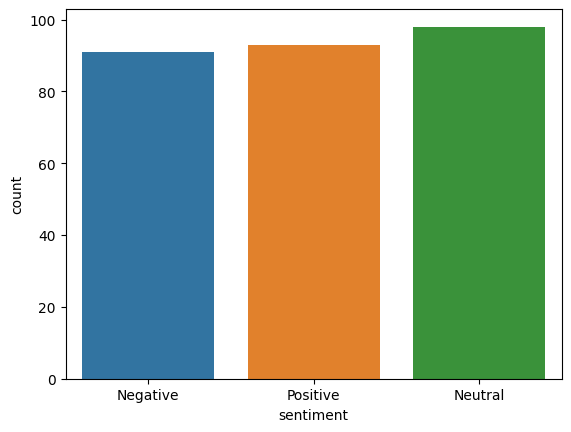

In [11]:
# Visualise the sentiment distribution
sns.countplot(x ='sentiment', data = df_tweet)